In [21]:
import pandas as pd
import scipy as scp
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
def simulate(bias, shape, seed) :
    scp.random.seed(seed)
    data = scp.random.binomial(1, bias, shape)
    return pd.DataFrame(data)

In [3]:
bias = 0.5

In [4]:
n = 20

In [5]:
N = 1000000

In [6]:
experiment = simulate(bias, (N, n), 2017)

In [7]:
experiment['mean'] = experiment.mean(axis = 1)

In [8]:
experiment.head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,mean
0,0,1,0,0,1,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0.35
1,0,0,0,0,0,1,0,0,1,1,...,0,1,0,1,1,0,0,1,0,0.35
2,1,1,0,0,0,1,1,0,1,1,...,1,0,0,1,0,0,0,1,1,0.50
3,0,0,1,0,1,0,0,1,1,1,...,1,1,0,0,0,1,0,0,0,0.40
4,0,1,0,0,1,1,1,0,0,1,...,0,0,0,1,1,1,1,1,1,0.60
5,1,0,0,1,1,0,1,1,1,1,...,0,0,1,1,0,1,0,1,1,0.65
6,1,0,0,1,1,0,0,0,1,0,...,1,0,0,1,1,0,1,1,1,0.55
7,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0.30
8,0,0,1,1,0,1,0,1,0,0,...,0,1,0,1,1,1,0,1,0,0.45
9,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0.15


In [9]:
freqs = (experiment[[0,'mean']].groupby('mean').count() / N).reset_index().rename(columns = {0 : 'freq'})

In [10]:
def hoeffding_bound(bias, alpha, n) :
    return scp.exp(-2 * n * ((alpha - bias) ** 2))

In [11]:
def markov_bound(bias, alpha) :
    if (alpha == 0) : return scp.nan
    else : return bias / alpha

In [12]:
freqs['hoef_bound'] = freqs['mean'].apply(lambda x : hoeffding_bound(bias, x, n))

In [13]:
freqs['mark_bound'] = freqs['mean'].apply(lambda x : markov_bound(bias, x))

In [14]:
freqs = freqs[freqs['mean']>=0.5]

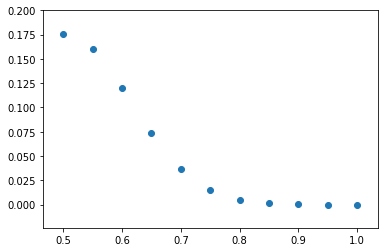

In [15]:
plt.scatter(freqs['mean'], freqs['freq'])

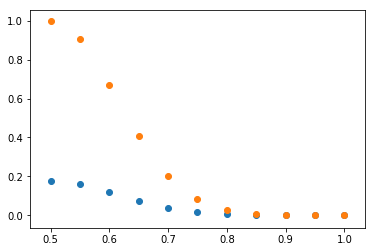

In [16]:
plt.scatter(freqs['mean'], freqs['freq'])
plt.scatter(freqs['mean'], freqs['hoef_bound'])

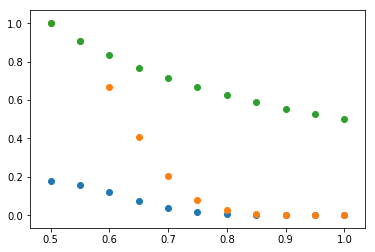

In [17]:
plt.scatter(freqs['mean'], freqs['freq'])
plt.scatter(freqs['mean'], freqs['hoef_bound'])
plt.scatter(freqs['mean'], freqs['mark_bound'])

In [18]:
#Prob that alpha equals to 1:
(0.5) ** 20, hoeffding_bound(1,0.5,20)

(9.5367431640625e-07, 4.5399929762484854e-05)

In [22]:
#Prob that alpha equals to 0.95:
sts.binom(20, 0.5).pmf(1), hoeffding_bound(0.95,0.5,20)

(1.907348632812499e-05, 0.00030353913807886732)